# Mini-Project for Fundamentals of Machine Learning Course
In this study, facial expression recognition was performed on the face images from the Facial Expression Recognition Challenge (FER2013) dataset.

One motivation for representation learning is that learning algorithms can design features more effectively and efficiently than humans can. However, this challenge does not explicitly require entries to use representation learning. The dataset, assembled from the internet, is designed for facial expression classification.

The data consists of grayscale images of faces, each measuring 48x48 pixels. The faces have been automatically aligned to be roughly centered and occupy a similar area within each image. The task is to categorize each face based on the emotion expressed, assigning it to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The dataset contains a total of 35,887 examples.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Prerequisite
This section provides some basic steps for accessing and visualizing the dataset.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def parse_data(data: pd.DataFrame):
    """
    Reads input dataframe then return arrays of images and labels
    """
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['emotion'])))

    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, 'pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image

    return image_array, image_label

In [4]:
def show_img(images: np.ndarray, labels: np.ndarray):
    """
    Visualize images and labels respectively
    """
    _, axarr=plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
    axarr=axarr.flatten()
    for idx, label in enumerate(labels[:10]):
        axarr[idx].imshow(images[idx], cmap='gray')
        axarr[idx].set_xticks([])
        axarr[idx].set_yticks([])
        axarr[idx].set_title("Label:{}".format(label))

In [5]:
## load dataset here
df = pd.read_csv("/content/drive/MyDrive/Nhập môn máy học/icml_face_data.csv")
df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


The ```emotion``` column contains a numeric code ranging from 0 to 6, inclusive, for the emotion expressed by the image. The "pixels" column contains a string surrounded in quotes for each image.

In [6]:
## parsing data here
images, labels = parse_data(df)


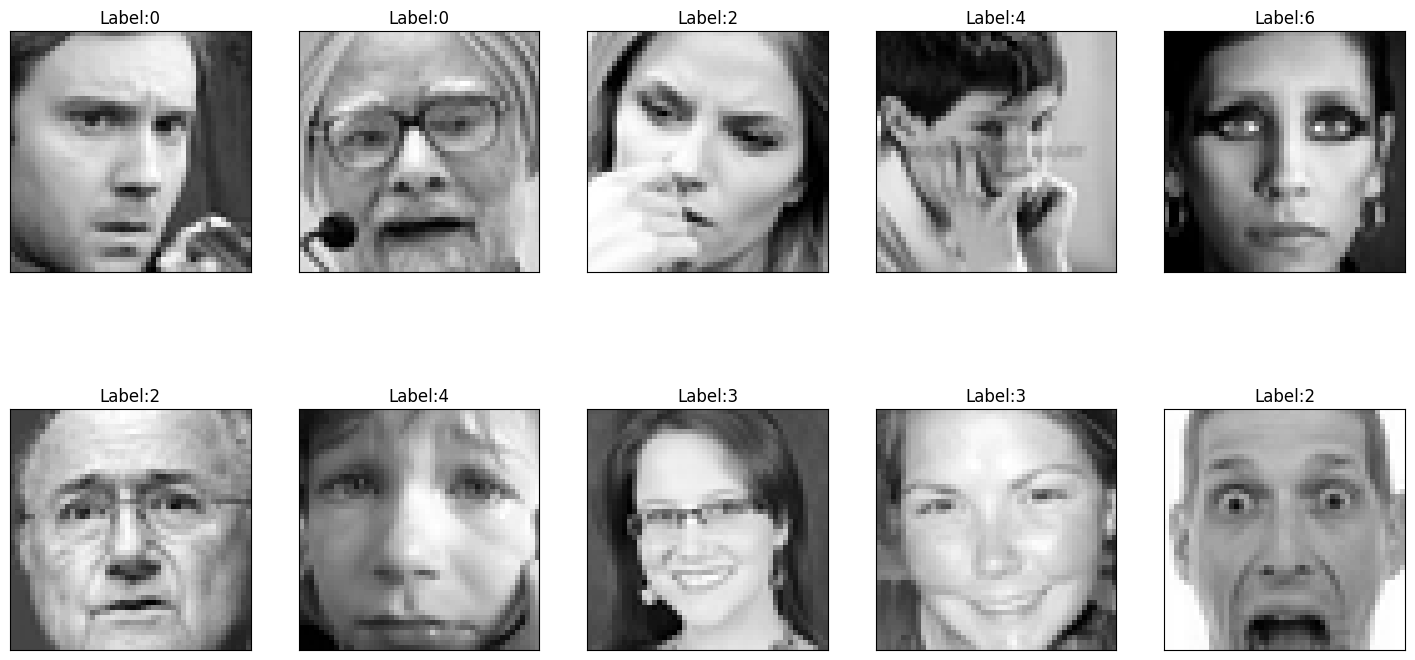

In [7]:
## showing images here
show_img(images, labels)

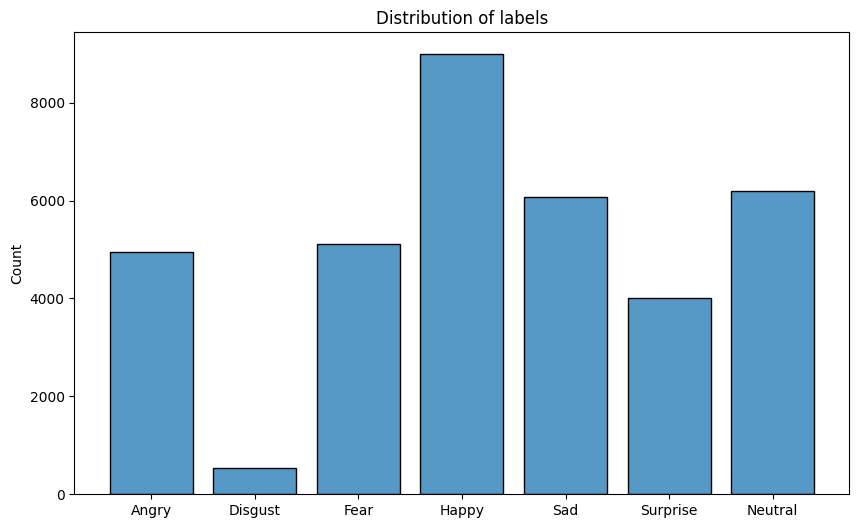

In [10]:
import seaborn as sns
labels_name = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Show distribution of labels
plt.figure(figsize=(10, 6))
sns.histplot(labels, discrete=True, shrink=.8)
plt.title('Distribution of labels')
plt.xticks(ticks=range(len(labels_name)), labels=labels_name)
plt.show()

## 2. Principle Component Analysis

Unsupervised learning can be further categorized into two main tasks: data transformation and clustering. In this study, we will focus on data transformation using unsupervised learning techniques. These techniques aim to modify the data to make it easier for computers and humans to analyze and understand.

One of the most common applications of unsupervised data transformation is dimensionality reduction. This process reduces the number of features (dimensions) in the data. When the data has a high number of features, it can be computationally expensive and difficult to analyze. Dimensionality reduction techniques help to overcome these challenges.

Principal Component Analysis (PCA) is a popular technique for dimensionality reduction. It transforms the data into a new set of features called principal components (PCs). These PCs are ordered by their importance, capturing the most significant variations in the data. By selecting a subset of the most informative PCs, we can achieve a significant reduction in data size while preserving the essential information for analysis.

Question 1: Can you visualize the data projected onto two principal components? (2 points)

In [11]:
from sklearn.decomposition import PCA
# Reshape sang dạng 2D để áp dụng PCA (Số lượng mẫu, Số lượng features)
images_reshaped = images.reshape(images.shape[0], -1)

# Áp dụng PCA để giảm chiều dữ liệu xuống còn 2
pca = PCA(n_components=2)

images_pca = pca.fit_transform(images_reshaped)
images_pca.shape

(35887, 2)

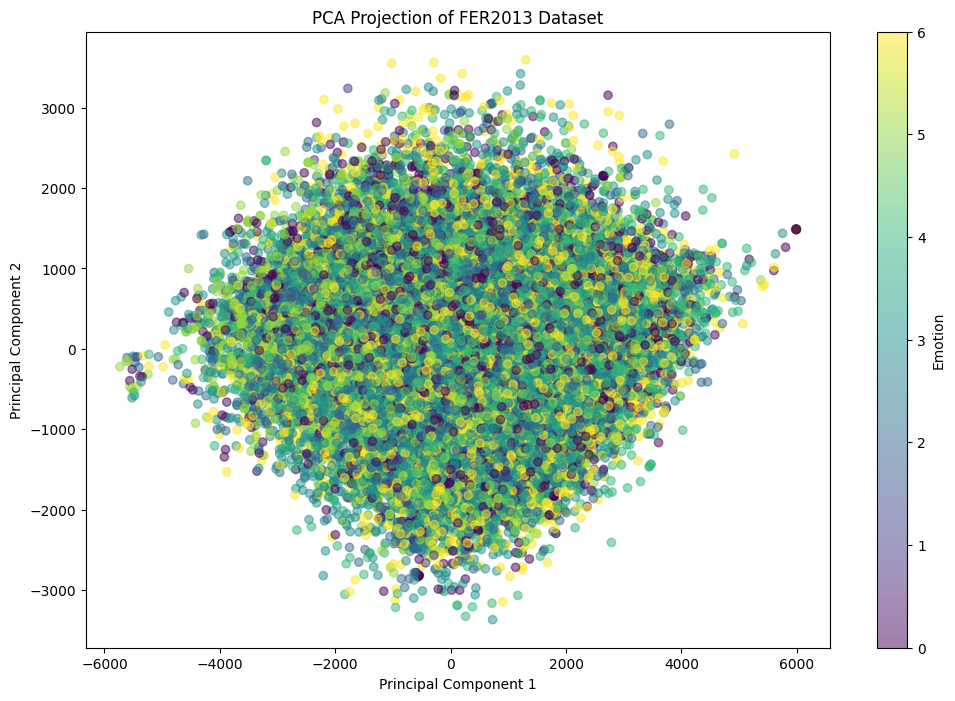

In [12]:
## transform for visualizing here
plt.figure(figsize=(12, 8))
scatter = plt.scatter(images_pca[:, 0], images_pca[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.colorbar(scatter, ticks=range(7), label='Emotion')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection of FER2013 Dataset')
plt.show()


Question 2: How to determine the optimal number of principal components using ```pca.explained_variance_```? Explain your selection process. (2 points)

#### Các bước thực hiện:

1. **Huấn luyện PCA với số lượng thành phần đầy đủ**:
   - Chúng ta sẽ huấn luyện PCA mà không giới hạn số lượng thành phần để có thể quan sát được toàn bộ `explained_variance_`.

2. **Tính toán và trực quan hóa tỷ lệ phương sai giải thích**:
   - Sử dụng `explained_variance_ratio_` để xác định tỷ lệ phương sai giải thích bởi từng thành phần chính.
   - Trực quan hóa tỷ lệ phương sai giải thích bằng biểu đồ tích lũy.

3. **Xác định số lượng thành phần chính tối ưu**:
   - Dựa vào biểu đồ, chọn số lượng thành phần chính mà tại đó tỷ lệ phương sai giải thích tích lũy đạt đến một mức ngưỡng nhất định (thường là 90-95%).


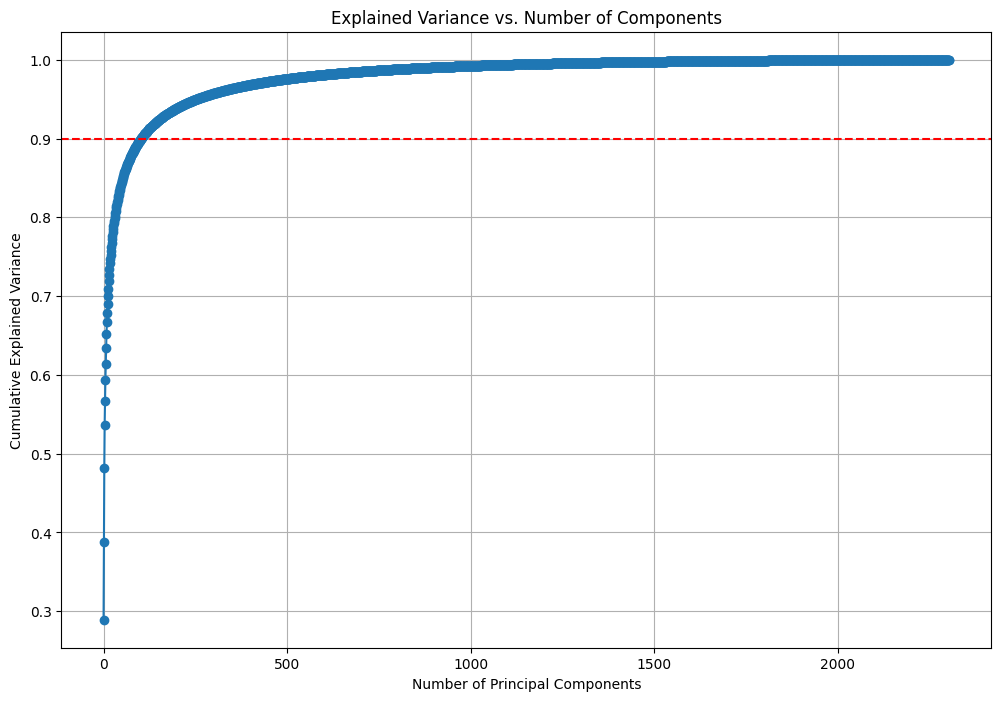

The optimal number of principal components is: 104


In [14]:
## determine the optimal number of PCs here
## pca.explained_variance_()

# Huấn luyện PCA mà không giới hạn số lượng thành phần
pca_full = PCA()
pca_full.fit(images_reshaped)

# Tính toán tỷ lệ phương sai giải thích tích lũy
cumulative_variance_ratio = np.cumsum(pca_full.explained_variance_ratio_)

# Trực quan hóa tỷ lệ phương sai giải thích tích lũy
plt.figure(figsize=(12, 8))
plt.plot(cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.axhline(y=0.90, color='r', linestyle='--')
plt.show()

# In ra số lượng thành phần chính tối ưu
optimal_components = np.argmax(cumulative_variance_ratio >= 0.90) + 1
print(f'The optimal number of principal components is: {optimal_components}')


## 3. Image Classification

The classification task will compare the performance using both:

- Original data: The data before applying PCA.
- Transformed data: The data projected onto the optimal number of principal components identified earlier. Utilize the **optimal number of principal components** identified in the previous question.

Compare the performance of **4** different classification algorithms (3 machine learning and 1 MLP models) in both formats above. (4 points)

Perform hyperparameter tuning using ```GridSearchCV``` for each classification method. (1 point)

Inspiration: Draw inspiration from the example provided in the scikit-learn documentation: https://scikit-learn.org/dev/auto_examples/datasets/plot_iris_dataset.html

In [26]:
from sklearn.model_selection import train_test_split
from skimage.transform import resize
import tensorflow as tf
import seaborn as sns
import re
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from joblib import parallel_backend
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [16]:
# splitting data into train/val/test subsets here
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [23]:
# Resize images
from skimage.transform import resize

def resize_images(images, new_size=(24, 24)):
    resized_images = np.zeros((images.shape[0], new_size[0], new_size[1]))
    for i in range(images.shape[0]):
        resized_images[i] = resize(images[i], new_size, anti_aliasing=True)
    return resized_images

# Resizing the images
X_train_resized = resize_images(X_train, new_size=(24, 24))
X_test_resized = resize_images(X_test, new_size=(24, 24))

print(X_train_resized.shape)
print(X_test_resized.shape)

(28709, 24, 24)
(7178, 24, 24)


In [24]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model


# Prepare data for CNN
X_train_cnn = X_train_resized[..., np.newaxis]
X_test_cnn = X_test_resized[..., np.newaxis]
input_shape = X_train_cnn.shape[1:]

# Define a simple CNN model for feature extraction
def build_cnn(input_shape):
    inputs = Input(shape=input_shape)  # Explicitly define input layer
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)  # Use 'same' padding to preserve image size
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    outputs = Dense(128, activation='relu')(x)
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Build the CNN model
cnn_model = build_cnn(input_shape)

# Extract features using the CNN - no need to compile if not training
cnn_feature_extractor = Model(inputs=cnn_model.input, outputs=cnn_model.layers[-2].output)  # Output before the Flatten layer
X_train_features = cnn_feature_extractor.predict(X_train_cnn)
X_test_features = cnn_feature_extractor.predict(X_test_cnn)

print(X_train_features.shape)
print(X_test_features.shape)

225/225 [==============================] - 2s 10ms/step
(28709, 2304)
(7178, 2304)


In [25]:
# Scale the extracted features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_features)
X_test_scaled = scaler.transform(X_test_features)

In [30]:
# Function to train and evaluate models
def train_and_evaluate_model(model, param_grid, X_train, y_train, X_test, y_test, model_name):
    grid_search = GridSearchCV(model, param_grid, cv=2, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    print(f"{model_name} - Result:")
    print(f"Best parameters: {grid_search.best_params_}")
    print("Classification report:")
    print(classification_report(y_test, grid_search.predict(X_test)))

    return grid_search

# Function to extract accuracy from classification report
def extract_accuracy_from_report(report):
    accuracy_line = re.search(r"accuracy\s+(\d+\.\d+)", report)
    if accuracy_line:
        return float(accuracy_line.group(1))
    else:
        return None

# Function to plot accuracy comparison
def plot_accuracy_comparison(accuracies, model_names, title):
    df = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Model', y='Accuracy', data=df)
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.show()

In [31]:
# Model definitions and parameter grids
models = [
    (LogisticRegression(max_iter=2000), {'C': [0.1, 1, 10]}, 'Logistic Regression'),
    (DecisionTreeClassifier(), {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}, 'Decision Tree'),
    (RandomForestClassifier(), {'n_estimators': [50, 100, 200]}, 'Random Forest'),
    (MLPClassifier(max_iter=1000, early_stopping=True, n_iter_no_change=10), {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'alpha': [0.0001, 0.001]}, 'Neural Network (MLP)')
]

## Original Data


In [ ]:
# Scale the extracted features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_features)
X_test_scaled = scaler.transform(X_test_features)

# Training and evaluating models on original data
accuracies = []
for model, param_grid, model_name in models:
    grid_search = train_and_evaluate_model(model, param_grid, X_train_scaled, y_train, X_test_scaled, y_test, model_name)
    report = classification_report(y_test, grid_search.predict(X_test_scaled))
    accuracies.append(extract_accuracy_from_report(report))

# Plot accuracy comparison for original data
plot_accuracy_comparison(accuracies, [name for _, _, name in models], 'Comparison of Model Accuracies (Original Data)')

## PCA

In [ ]:
# Flatten and apply PCA
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

pca = PCA(n_components=104)
X_train_pca = pca.fit_transform(X_train_flat)
X_test_pca = pca.transform(X_test_flat)

# Scale the PCA-transformed features
X_train_scaled_pca = scaler.fit_transform(X_train_pca)
X_test_scaled_pca = scaler.transform(X_test_pca)

# Training and evaluating models on PCA-transformed data
accuracies_pca = []
for model, param_grid, model_name in models:
    grid_search = train_and_evaluate_model(model, param_grid, X_train_scaled_pca, y_train, X_test_scaled_pca, y_test, model_name)
    report = classification_report(y_test, grid_search.predict(X_test_scaled_pca))
    accuracies_pca.append(extract_accuracy_from_report(report))

# Plot accuracy comparison for PCA-transformed data
plot_accuracy_comparison(accuracies_pca, [name for _, _, name in models], 'Comparison of Model Accuracies (PCA Data)')

## 4. Evaluating Classification Performance

Compare the performance of the different classification models using various metrics: accuracy, precision, recall, and F1-score.
Based on the evaluation metrics, explain which model performs best and why. Identify the emotion category where the model makes the most accurate and most errors. (1 point)



In [ ]:
from sklearn.metrics import confusion_matrix

# Evaluate and compare models
def evaluate_models(models, X_test, y_test):
    model_metrics = {}
    for name, model in models.items():
        report = classification_report(y_test, model.predict(X_test), output_dict=True)
        model_metrics[name] = report

    return model_metrics

# Print the best model based on a chosen metric
def print_best_model(metrics, metric='accuracy'):
    best_model_name = max(metrics, key=lambda model: metrics[model][metric])
    best_model_metrics = metrics[best_model_name]

    print(f"\nBest Model: {best_model_name}")
    print(f"Accuracy: {best_model_metrics['accuracy']:.4f}")
    print(f"Precision: {best_model_metrics['macro avg']['precision']:.4f}")
    print(f"Recall: {best_model_metrics['macro avg']['recall']:.4f}")
    print(f"F1-Score: {best_model_metrics['macro avg']['f1-score']:.4f}")

    return best_model_name

In [ ]:
# Identify the emotion categories with most accurate predictions and most errors
def analyze_emotion_errors(model, X_test, y_test, emotion_labels):
    confusion = confusion_matrix(y_test, model.predict(X_test))
    true_positives = np.diag(confusion)
    most_accurate_emotion = emotion_labels[np.argmax(true_positives)]
    most_errors_emotion = emotion_labels[np.argmax(confusion.sum(axis=1) - true_positives)]

    print(f"Most accurately predicted emotion: {most_accurate_emotion}")
    print(f"Emotion with most prediction errors: {most_errors_emotion}")

# Models and their best estimators
models_best_estimators = {
    'Logistic Regression': grid_search_lr.best_estimator_,
    'Decision Tree': grid_search_dt.best_estimator_,
    'Random Forest': grid_search_rf.best_estimator_,
    'Neural Network (MLP)': grid_search_mlp.best_estimator_
}

# Evaluate models on original data
metrics_original = evaluate_models(models_best_estimators, X_test_scaled, y_test)
best_model_original_name = print_best_model(metrics_original)

# Evaluate models on PCA-transformed data
metrics_pca = evaluate_models(models_best_estimators, X_test_scaled_pca, y_test)
best_model_pca_name = print_best_model(metrics_pca)

# Emotion labels
emotion_labels = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

# Analyze errors for the best model on original data
print(f"\nAnalysis for the best model on original data: {best_model_original_name}")
analyze_emotion_errors(models_best_estimators[best_model_original_name], X_test_scaled, y_test, emotion_labels)

# Analyze errors for the best model on PCA-transformed data
print(f"\nAnalysis for the best model on PCA-transformed data: {best_model_pca_name}")
analyze_emotion_errors(models_best_estimators[best_model_pca_name], X_test_scaled_pca, y_test, emotion_labels)